Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

April-May Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ActivitySiteID                           2177 non-null   object 
 1   ActivityDescription                      2177 non-null   object 
 2   BookingEndDateTime (Month / Day / Year)  2177 non-null   object 
 3   BookingStartTime                         2177 non-null   object 
 4   MaxBookees                               2177 non-null   int64  
 5   Number Booked                            2177 non-null   int64  
 6   Price (INR)                              2159 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 119.2+ KB
None

June Data Info:
<class 'pandas.core.frame.D

/tmp/ipython-input-1877899976.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_april_may.fillna(method='ffill', inplace=True)
/tmp/ipython-input-1877899976.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_june.fillna(method='ffill', inplace=True)


,ActivitySiteID_april_may,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime_april_may,MaxBookees_april_may,Number Booked_april_may,Price (INR)_april_may,ActivitySiteID_june,BookingStartTime_june,MaxBookees_june,Number Booked_june,Price (INR)_june
0,SBP,Body Balan 11.30-12.30pm,2018-04-01,11:30:00,0.187581,-0.380501,0.809671,NaN,NaN,NaN,NaN,NaN
1,BRP,Body Combat 9-10am,2018-04-01,9:00:00,0.187581,1.178700,-0.442570,NaN,NaN,NaN,NaN,NaN
2,SBP,Body Combat 9.15-10.15am,2018-04-01,9:15:00,0.187581,1.074753,-0.442570,NaN,NaN,NaN,NaN,NaN
3,SBP,Body Con 10.30-11.30am,2018-04-01,10:30:00,0.521594,0.658966,-0.693018,NaN,NaN,NaN,NaN,NaN
4,TSC,Body Conditioning 10-11am,2018-04-01,10:00:00,-0.146432,-0.484448,-0.693018,NaN,NaN,NaN,NaN,NaN



Ensuring data consistency...

Conducting quality checks...
Checking for anomalies: Negative values in 'Capacity', 'Booked', 'Available' columns
Anomalies found in MaxBookees_april_may: 1126 rows
Anomalies found in Number Booked_april_may: 1135 rows
Anomalies found in Price (INR)_april_may: 1108 rows
Anomalies found in MaxBookees_june: 577 rows
Anomalies found in Number Booked_june: 569 rows
Anomalies found in Price (INR)_june: 580 rows


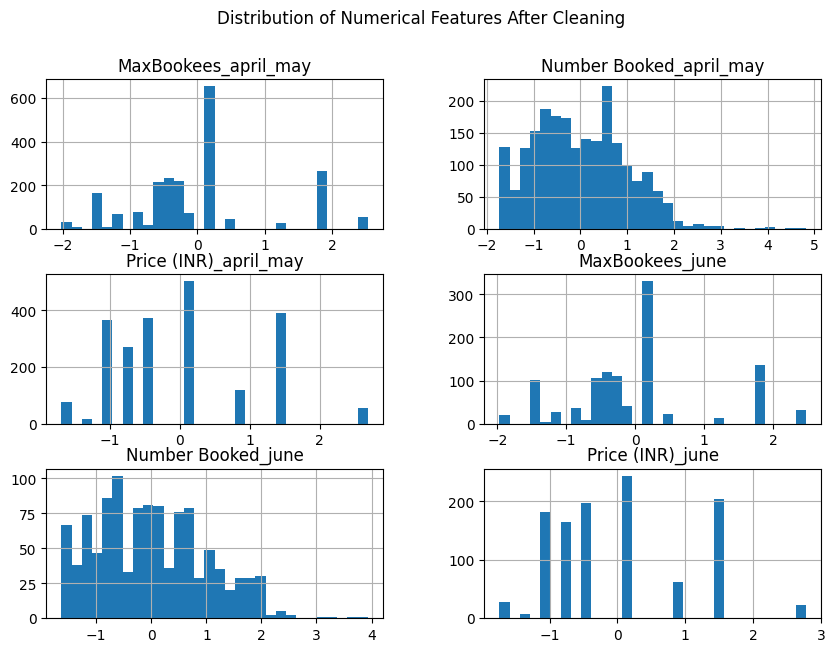


Quality Report Summary:
{'Missing Values': {'ActivitySiteID_april_may': 1112, 'ActivityDescription': 0, 'BookingEndDateTime (Month / Day / Year)': 0, 'BookingStartTime_april_may': 1112, 'MaxBookees_april_may': 1112, 'Number Booked_april_may': 1112, 'Price (INR)_april_may': 1112, 'ActivitySiteID_june': 2177, 'BookingStartTime_june': 2177, 'MaxBookees_june': 2177, 'Number Booked_june': 2177, 'Price (INR)_june': 2177}, 'Duplicate Rows': np.int64(0), 'Anomalies in Capacity/Booked/Available': {'MaxBookees_april_may': 1126, 'Number Booked_april_may': 1135, 'Price (INR)_april_may': 1108, 'MaxBookees_june': 577, 'Number Booked_june': 569, 'Price (INR)_june': 580}}

Cleaned and integrated data saved to /content/Cleaned_Fitness_Classes_Data.csv


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load Raw Data
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
df_april_may = pd.read_csv('/content/drive/MyDrive/CultFit_Project/Classes April-May 2018.csv')
df_june = pd.read_csv('/content/drive/MyDrive/CultFit_Project/Classes June 2018.csv')

# Display basic information about datasets
print("\nApril-May Data Info:")
print(df_april_may.info())
print("\nJune Data Info:")
print(df_june.info())

# Step 2: Data Cleaning

# 2.1 Handle Missing Values
print("\nChecking for missing values...")
print(df_april_may.isnull().sum())
print(df_june.isnull().sum())

# Fill missing values with appropriate strategies or drop rows with too many missing values
df_april_may.fillna(method='ffill', inplace=True)
df_june.fillna(method='ffill', inplace=True)

# 2.2 Remove Duplicates
print("\nRemoving duplicate rows if any...")
df_april_may.drop_duplicates(inplace=True)
df_june.drop_duplicates(inplace=True)

# 2.3 Correct Data Types
print("\nCorrecting data types for date columns...")
date_column_name = 'BookingEndDateTime (Month / Day / Year)'
if date_column_name in df_april_may.columns:
    df_april_may[date_column_name] = pd.to_datetime(df_april_may[date_column_name], format='%d-%b-%y', errors='coerce')
if date_column_name in df_june.columns:
    df_june[date_column_name] = pd.to_datetime(df_june[date_column_name], format='%d-%b-%y', errors='coerce')

# Step 3: Transform Data

# 3.1 Normalize numerical columns if necessary
print("\nNormalizing numerical features...")
numeric_cols = ['MaxBookees', 'Number Booked', 'Price (INR)']
scaler = StandardScaler()

for col in numeric_cols:
    if col in df_april_may.columns:
        # Check if the column has numerical data before scaling
        if pd.api.types.is_numeric_dtype(df_april_may[col]):
            df_april_may[col] = scaler.fit_transform(df_april_may[[col]])
    if col in df_june.columns:
         # Check if the column has numerical data before scaling
        if pd.api.types.is_numeric_dtype(df_june[col]):
            df_june[col] = scaler.fit_transform(df_june[[col]])


# Step 4: Data Integration and Merging

# Assuming both datasets share common columns like 'ClassID' or 'Date'
print("\nMerging datasets on 'BookingEndDateTime (Month / Day / Year)' and 'ActivityDescription' columns...")
merged_df = pd.merge(df_april_may, df_june, how='outer', on=[date_column_name, 'ActivityDescription'], suffixes=('_april_may', '_june'))

# Display information about the merged dataframe
print("\nMerged Data Info:")
print(merged_df.info())

# Display the first few rows of the merged dataframe
print("\nMerged Data Head:")
display(merged_df.head())


# Step 5: Ensure Data Consistency

# Ensuring data formats are aligned
print("\nEnsuring data consistency...")
# Use the correct column name for date conversion in the merged dataframe
merged_df[date_column_name] = pd.to_datetime(merged_df[date_column_name], errors='coerce')

# Step 6: Conduct Quality Checks

print("\nConducting quality checks...")
print("Checking for anomalies: Negative values in 'Capacity', 'Booked', 'Available' columns")
# Select the numerical columns from the merged dataframe for anomaly checks
numeric_cols_for_anomaly_check = [col for col in merged_df.columns if merged_df[col].dtype in [np.int64, np.float64]]
for col in numeric_cols_for_anomaly_check:
    anomalies = merged_df[merged_df[col] < 0]
    print(f"Anomalies found in {col}: {len(anomalies)} rows")


# Visualizing distribution of numerical data
# Select the numerical columns from the merged dataframe for visualization
merged_numeric_cols = [col for col in merged_df.columns if merged_df[col].dtype in [np.int64, np.float64]]
if merged_numeric_cols:
    merged_df[merged_numeric_cols].hist(bins=30, figsize=(10, 7))
    plt.suptitle('Distribution of Numerical Features After Cleaning')
    plt.show()
else:
    print("No numerical columns found in the merged dataframe for visualization.")


# Step 7: Generate Quality Report
quality_report = {
    'Missing Values': merged_df.isnull().sum().to_dict(),
    'Duplicate Rows': merged_df.duplicated().sum(),
    'Anomalies in Capacity/Booked/Available': {
        col: len(merged_df[merged_df[col] < 0]) for col in merged_numeric_cols if col in merged_df.columns
    }
}

print("\nQuality Report Summary:")
print(quality_report)

# Save the cleaned dataset
output_file = '/content/Cleaned_Fitness_Classes_Data.csv'
merged_df.to_csv(output_file, index=False)
print(f"\nCleaned and integrated data saved to {output_file}")